# Data Mining Project
## Discover and describe aeras of interest and events from geo-located data.
### Team:
- **SCHLEE Adam**
- **KUSNO Louis**

## Imports

In [120]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy
# data frames 
! pip install pandas
# machine learning algorithms 
! pip install scikit-learn
! pip install scipy
# plotting 
! pip install matplotlib
! pip install folium
! pip install plotly
! pip install plotly-express
! pip install nbformat==5.9.2
! pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
# load pandas to deal with the data
import pandas as pd
# plotting
import matplotlib.pyplot as plt
# folium for maps
import folium as fl
# numpy
import numpy as np
# scaler
from sklearn.preprocessing import StandardScaler
# k-means
from sklearn.cluster import KMeans
# silhouette scores
from sklearn.metrics import silhouette_score, silhouette_samples
# dendrogram
from scipy.cluster.hierarchy import dendrogram
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
# DBSCAN
from sklearn.cluster import DBSCAN
# Nearest Neighbors
from sklearn.neighbors import NearestNeighbors
# Interactive plot
import plotly.express as px 
# word cloud
from wordcloud import WordCloud

##### Couleurs utilisés pour a map

In [16]:
colors = [
    "red", "blue", "green", "yellow", "purple", "orange", "pink", "white", "black", "gray", "lightgray", "darkgray",
    "beige", "ivory", "cream", "darkred", "lightred", "darkblue", "lightblue", "cadetblue", "darkcadetblue",
    "darkgreen", "lightgreen", "lime", "teal", "aqua", "cyan", "magenta", "maroon", "navy", "indigo", "violet",
    "gold", "silver", "bronze", "coral", "salmon", "chocolate", "khaki", "tan", "olive", "chartreuse", "turquoise",
    "peach", "lavender", "plum", "orchid", "amber", "ruby", "sapphire", "emerald", "amethyst", "periwinkle",
    "mint", "mustard", "fuchsia", "sand", "brick", "copper", "strawberry", "raspberry", "wine", "mahogany",
    "espresso", "jade", "slate", "coal", "charcoal", "snow", "pearl", "eggshell", "sunflower", "apricot", "honey",
    "lemon", "tangerine", "blush", "rose", "skyblue", "seafoam", "midnightblue", "denim", "forestgreen", "seagreen",
    "pistachio", "caramel", "mocha", "espresso", "graphite", "obsidian", "creamwhite", "carnation", "buttercup",
    "mauve", "heather", "melon", "watermelon", "storm", "fog", "ash", "cobalt", "cerulean", "crimson", "brickred",
    "umber", "ochre", "sienna", "mandarin", "flamingo", "parrotgreen", "spearmint", "limegreen", "arcticblue",
    "desert", "sunset", "sunrise", "midday", "dusk", "twilight", "night", "day", "floralwhite"
]

In [17]:
data = pd.read_table("data/dataset.csv", sep=",")
#data = data.sample(n=20000, random_state=45).reset_index(drop=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168099 entries, 0 to 168098
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  168099 non-null  int64  
 1   user                168099 non-null  object 
 2   lat                 168099 non-null  float64
 3   long                168099 non-null  float64
 4   tags                126103 non-null  object 
 5   title               152319 non-null  object 
 6   date_taken_minute   168099 non-null  int64  
 7   date_taken_hour     168099 non-null  int64  
 8   date_taken_day      168099 non-null  int64  
 9   date_taken_month    168099 non-null  int64  
 10  date_taken_year     168099 non-null  int64  
 11  date_upload_minute  168099 non-null  int64  
 12  date_upload_hour    168099 non-null  int64  
 13  date_upload_day     168099 non-null  int64  
 14  date_upload_month   168099 non-null  int64  
 15  date_upload_year    168099 non-nul

id          user        lat      long  \
0  4395181099  30624617@N03  45.754858  4.821710   
1  4394748717  35853470@N00  45.753270  4.862953   
2  4394694699  11817998@N05  45.760655  4.846564   
3  4394803790  11545749@N06  45.784000  4.874072   
4  4394803554  11545749@N06  45.784000  4.874072   

                                                tags  \
0                 chair,lyon,rhône,chaise,rhônealpes   
1                                                NaN   
2                                         365,iphone   
3       nin,nineinchnails,gift,screening,toiou,avott   
4  lyon,nin,nineinchnails,gift,screening,toiou,avott   

                         title  date_taken_minute  date_taken_hour  \
0             Chaises avec vue                 11               15   
1                          NaN                 51               17   
2       59/365 - R46 V103 B163                 29               17   
3  2010-01-29 Toiou Avott Lyon                 15               20   
4  2010-01-28 Toiou Avott Lyon                 10               20   

   date_taken_day  date_taken_month  date_taken_year  date_upload_minute  \
0              28                 2             2010                  23   
1              28                 2             2010                  52   
2              28                 2             2010                  33   
3              28                 1             2010                  38   
4              28                 1             2010                  38   

   date_upload_hour  date_upload_day  date_upload_month  date_upload_year  
0                20               28                  2              2010  
1                17               28                  2              2010  
2                17               28                  2              2010  
3                12               28                  2              2010  
4                12               28                  2              2010

> ### Affichage de la carte et des points avec Folium 

In [18]:
# Affichage de la carte et des points avec Folium 

# Création de la carte
map = fl.Map(location=[48.8566, 2.3522], zoom_start=12)

# Ajout des points sur la carte

for i in range(0, 5000):
    fl.Circle(
        location=[data.loc[i]['lat'], data.loc[i]['long']],
        radius=10,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(map)

# Recentrer la carte
map.fit_bounds(map.get_bounds())

# Affichage de la carte
map.save("map.html")

> ### Clustering des points sur la map avec K-Means

#### Préparation des données pour le clustering

In [19]:
# select columns to keep
keep_col = ['lat', 'long', 'tags', 'title']
df_clustering = data[keep_col]

#### Scaling des données

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-0.47263601 -0.56311193]
 [-0.52770132  0.74119245]
 [-0.27161991  0.22289251]
 ...
 [-1.35201645  3.54306078]
 [ 0.11664598 -0.20243032]
 [-0.2234551  -0.57424388]]


lat      long
0 -0.472636 -0.563112
1 -0.527701  0.741192
2 -0.271620  0.222893
3  0.537889  1.092829
4  0.537889  1.092829

#### Recherche du k optimal

##### Avec la méthode du Elbow

Applying k-means with 1/1680 clusters
Applying k-means with 2/1680 clusters
Applying k-means with 3/1680 clusters
Applying k-means with 4/1680 clusters
Applying k-means with 5/1680 clusters
Applying k-means with 6/1680 clusters
Applying k-means with 7/1680 clusters
Applying k-means with 8/1680 clusters
Applying k-means with 9/1680 clusters
Applying k-means with 10/1680 clusters
Applying k-means with 11/1680 clusters
Applying k-means with 12/1680 clusters
Applying k-means with 13/1680 clusters
Applying k-means with 14/1680 clusters
Applying k-means with 15/1680 clusters
Applying k-means with 16/1680 clusters
Applying k-means with 17/1680 clusters
Applying k-means with 18/1680 clusters
Applying k-means with 19/1680 clusters
Applying k-means with 20/1680 clusters
Applying k-means with 21/1680 clusters
Applying k-means with 22/1680 clusters
Applying k-means with 23/1680 clusters
Applying k-means with 24/1680 clusters
Applying k-means with 25/1680 clusters
Applying k-means with 26/1680 clus

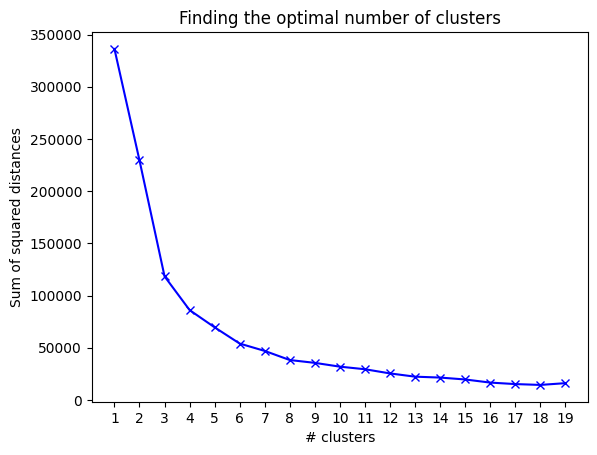

In [21]:
# range of k
range_k = range(1, len(scaled_data_df)//1000)
# a list of intertia scores
inertias = []

# vary k and apply k-means
for i in range_k:
    # apply k-means with i clusters
    print(f"Applying k-means with {i}/{len(scaled_data_df)//100} clusters")
    kmeans = KMeans(n_clusters=i, init='k-means++')
    # fit scaled data 
    kmeans.fit(scaled_data_df)
    # append inertia to the list
    inertias.append(kmeans.inertia_)

# visualise
n = 19
xticks_new = np.arange(1, n+1)
plt.plot(xticks_new, inertias[0:n], 'bx-')
plt.title('Finding the optimal number of clusters')
plt.xticks(xticks_new)
plt.xlabel('# clusters')
plt.ylabel('Sum of squared distances')
plt.show()

#### Application de K-Means 

In [22]:
# number of clusters 
k = 100
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")



k-means labels: [56 44 43 ...  1 80  3]
Sum of squared distances: 1733.0791574458262


#### Affichage des clusters sur la maps

In [23]:
# Affichage des clusters sur la map avec une couleur différente pour chaque cluster

# add cluster labels to data_cleaned
data['cluster'] = labels

# create a map
map = fl.Map(location=[48.8566, 2.3522], zoom_start=12)

# style of the map
fl.TileLayer('Cartodb dark_matter').add_to(map)

for i in range(0, 9999):
    fl.Circle(
        location=[data.loc[i]['lat'], data.loc[i]['long']],
        radius=2,
        color=colors[data.loc[i]['cluster']%len(colors)],
        fill=True,
        fill_color=colors[data.loc[i]['cluster']%len(colors)],
        popup=f"Cluster: {data.loc[i]['cluster']}"
    ).add_to(map)

# recenter the map
map.fit_bounds(map.get_bounds())

# save the map
map.save("map_clusters.html")

> ### Evaluation du clustering avec le coefficient de silhouette

In [24]:
silhouette_avg = silhouette_score(scaled_data, labels, metric='euclidean')
sample_silhouette_values = silhouette_samples(scaled_data, labels, metric='euclidean')
data['silhouette kmeans'] = sample_silhouette_values

print(f"Average silhouette score: {silhouette_avg}")
print(f"Sample Silhouette values: {sample_silhouette_values}")

n_clusters = 7

KeyboardInterrupt: 

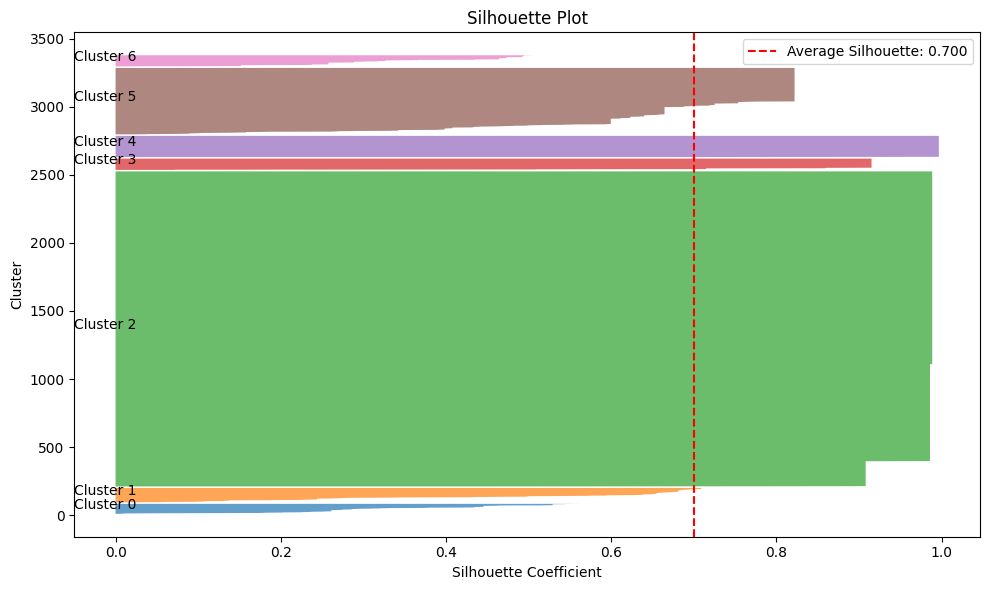

In [77]:
fig = plt.figure(figsize=(10, 6))
 
y_lower = 10
for i in range(n_clusters):
    # Get silhouette scores for cluster i
    ith_cluster_values = sample_silhouette_values[labels == i]
    ith_cluster_values.sort()
    
    size_cluster_i = ith_cluster_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    # Fill the silhouette
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_values,
                        alpha=0.7)
    
    # Label the silhouette plots
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    
    y_lower = y_upper + 10

# Add vertical line for average silhouette score
plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
            label=f'Average Silhouette: {silhouette_avg:.3f}')

plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.legend(loc='best')
plt.tight_layout()

> ### Application du clustering hierarchique

In [49]:
def plot_dendrogram(model, lbls, title='Hierarchical Clustering Dendrogram', x_title='Clusters', **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
           model.children_,
           model.distances_,
           counts
       ]).astype(float)

    fig = plt.figure(figsize=(12, 8))
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=lbls, leaf_rotation=90)
    
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Distance')
    
    fig.show()
    
    return fig

In [50]:
def hierarchical(data, labels, metric='euclidean', linkage='average', n_clusters=None, dist_thres=None):
    model = AgglomerativeClustering(distance_threshold=dist_thres, n_clusters=n_clusters, metric=metric, linkage=linkage, compute_full_tree=True, compute_distances=True)
    model = model.fit(data)
    
    txt_title = 'Hierarchical Clustering Dendrogram' + ', linkage: ' + linkage
    f = plot_dendrogram(model=model, lbls=labels, title=txt_title, x_title='Clusters')
    
    return model, f

In [51]:
linkage = ['complete', 'average', 'single']

for link in linkage:
    m, f = hierarchical(scaled_data, list(scaled_data_df.index), metric='euclidean', linkage=link, n_clusters=50, dist_thres=None)
    
    data['cluster ' + link] = m.labels_
    silhouette_avg = silhouette_score(scaled_data, m.labels_, metric='euclidean')
    sample_silhouette_values = silhouette_samples(scaled_data, m.labels_, metric='euclidean')
    data['silhouette ' + link] = sample_silhouette_values
    
    print(f"Linkage: {link}, silhouette score: {silhouette_avg}")

MemoryError: Unable to allocate 105. GiB for an array with shape (14128552851,) and data type float64

#### Afficher sur la map les clusters obtenus avec le clustering hierarchique

In [45]:
# create a map
map = fl.Map(location=[48.8566, 2.3522], zoom_start=12)

# style of the map
fl.TileLayer('Cartodb dark_matter').add_to(map)

# add points to the map with different colors for each cluster
for i in range(0, 9999):
    fl.Circle(
        location=[data.loc[i]['lat'], data.loc[i]['long']],
        radius=2,
        color=colors[data.loc[i]['cluster average']%len(colors)],
        fill=True,
        fill_color=colors[data.loc[i]['cluster average']%len(colors)],
        popup=f"Cluster: {data.loc[i]['cluster average']}"
    ).add_to(map)

# recenter the map
map.fit_bounds(map.get_bounds())

# save the map
map.save("map_clusters_average.html")

for i in range(0, 9999):
    fl.Circle(
        location=[data.loc[i]['lat'], data.loc[i]['long']],
        radius=2,
        color=colors[data.loc[i]['cluster complete']%len(colors)],
        fill=True,
        fill_color=colors[data.loc[i]['cluster complete']%len(colors)],
        popup=f"Cluster: {data.loc[i]['cluster complete']}"
    ).add_to(map)

# recenter the map
map.fit_bounds(map.get_bounds())

# save the map
map.save("map_clusters_complete.html")

for i in range(0, 9999):
    fl.Circle(
        location=[data.loc[i]['lat'], data.loc[i]['long']],
        radius=2,
        color=colors[data.loc[i]['cluster single']%len(colors)],
        fill=True,
        fill_color=colors[data.loc[i]['cluster single']%len(colors)],
        popup=f"Cluster: {data.loc[i]['cluster single']}"
    ).add_to(map)

# recenter the map
map.fit_bounds(map.get_bounds())

# save the map
map.save("map_clusters_single.html")

KeyError: 'cluster average'

> ### Application de DBSCAN

#### Recherche du eps optimal

In [28]:
def find_optimal_eps(data, min_pts):
    # Calculate distances to k-nearest neighbors
    neigh = NearestNeighbors(n_neighbors=min_pts)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    
    # Sort distances to kth neighbor in ascending order
    k_distances = np.sort(distances[:, min_pts-1])
    
    # Create plot
    fig = px.line(
        x=range(len(k_distances)),
        y=k_distances,
        title=f'K-distance Graph (k={min_pts})',
        labels={'x': 'Points sorted by distance', 
                'y': f'Distance to {min_pts}th nearest neighbor'}
    )
    
    return fig

min_pts = 15
fig = find_optimal_eps(scaled_data, min_pts)
fig.show()

D'après le graphe, la valeur optimal de eps est : 1.525

In [56]:
# Create ranges of epsilon and min_samples to test
eps_range = np.arange(0.005, 0.007, 0.001)
min_samples_range = range(15, 16)

# Store results
best_score = -1
best_eps = None
best_min_samples = None
scores = []

In [57]:
# Grid search
for eps in eps_range:
    print(f"Testing eps: {eps}/{eps_range[-1]}")
    for min_samples in min_samples_range:
        # Fit DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print(f"\nNumber of clusters: {n_clusters}")
        print(f"Number of noise points: {n_noise}")

        if len(set(labels) - {-1}) < 2:  # Vérifie qu'il y a au moins deux clusters sans tenir compte du bruit
            continue
            
        # Calculate silhouette score
        #score = silhouette_score(scaled_data, labels)
        #print(f"Score: {score}")
        #scores.append({'eps': eps, 'min_samples': min_samples, 'score': score})
        
        # Update best parameters if score is better
        #if score > best_score:
        #    print(f"New best score: {score}")
        #    best_score = score
        #    best_eps = eps
        #    best_min_samples = min_samples

        print("\n-------------------------------\n")

# Convert scores to DataFrame for easier analysis
scores_df = pd.DataFrame(scores)

Testing eps: 0.005/0.006

Number of clusters: 895
Number of noise points: 34918

-------------------------------

Testing eps: 0.006/0.006

Number of clusters: 774
Number of noise points: 29395

-------------------------------



In [109]:
best_eps = 0.004
min_samples = 150
print(f"Best score = {best_score}, best_eps = {best_eps}, best_min_samples = {min_samples}")

Best score = -1, best_eps = 0.004, best_min_samples = 150


In [110]:
# Apply DBSCAN with best parameters
best_dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
best_labels = best_dbscan.fit_predict(scaled_data)

In [115]:
# Print number of clusters and noise points
n_clusters = len(set(best_labels)) - (1 if -1 in best_labels else 0)
n_noise = list(best_labels).count(-1)
print(f"\nNumber of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters: 88
Number of noise points: 109445


In [118]:
data['cluster dbscan'] = best_labels

# Remove line that have no cluster (cluster dbscan == -1)
data = data[data['cluster dbscan'] != -1]
data = data.reset_index(drop=True)

#data['silhouette dbscan'] = silhouette_score(scaled_data, best_labels)
data.tail()

ValueError: Length of values (168099) does not match length of index (58654)

#### Afficher sur la map les clusters obtenus avec DBSCAN

In [119]:


# create a map
map = fl.Map(location=[48.8566, 2.3522], zoom_start=12)

# style of the map
fl.TileLayer('Cartodb dark_matter').add_to(map)

# Add points to the map with different colors for each cluster
for i in range(len(data)):  # Utiliser la taille réelle des données
    print(f"Adding point {i}/{len(data) - 1}")
    cluster = data.loc[i]['cluster dbscan']
    
    # Ignore noise points (-1)
    if cluster == -1:
        continue
    
    # Add cluster points to the map
    fl.Circle(
        location=[data.loc[i]['lat'], data.loc[i]['long']],
        radius=2,
        color=colors[cluster % len(colors)],
        fill=True,
        fill_color=colors[cluster % len(colors)],
        popup=f"Cluster: {cluster}\n"
    ).add_to(map)

# recenter the map
map.fit_bounds(map.get_bounds())

# show the map inline
map.save("map_clusters_dbscan.html")

Adding point 0/58653
Adding point 1/58653
Adding point 2/58653
Adding point 3/58653
Adding point 4/58653
Adding point 5/58653
Adding point 6/58653
Adding point 7/58653
Adding point 8/58653
Adding point 9/58653
Adding point 10/58653
Adding point 11/58653
Adding point 12/58653
Adding point 13/58653
Adding point 14/58653
Adding point 15/58653
Adding point 16/58653
Adding point 17/58653
Adding point 18/58653
Adding point 19/58653
Adding point 20/58653
Adding point 21/58653
Adding point 22/58653
Adding point 23/58653
Adding point 24/58653
Adding point 25/58653
Adding point 26/58653
Adding point 27/58653
Adding point 28/58653
Adding point 29/58653
Adding point 30/58653
Adding point 31/58653
Adding point 32/58653
Adding point 33/58653
Adding point 34/58653
Adding point 35/58653
Adding point 36/58653
Adding point 37/58653
Adding point 38/58653
Adding point 39/58653
Adding point 40/58653
Adding point 41/58653
Adding point 42/58653
Adding point 43/58653
Adding point 44/58653
Adding point 45/5865

### Description of areas of interest using text pattern mining

#### Preprocessing

As with other types of data, data preprocessing plays a major role with textual data.
- Removing stopwords (words that are used a lot while not bringing meaningful information,
such as “is”, “the”, “a”, ... or their french equivalent “est”, “le”, “un”, ...).
- Similarly, it will be interesting to remove frequent words in the dataset that are not a
stopword or meaningful (e.g. “picture”). You might consider visualizing the data with a
word cloud.

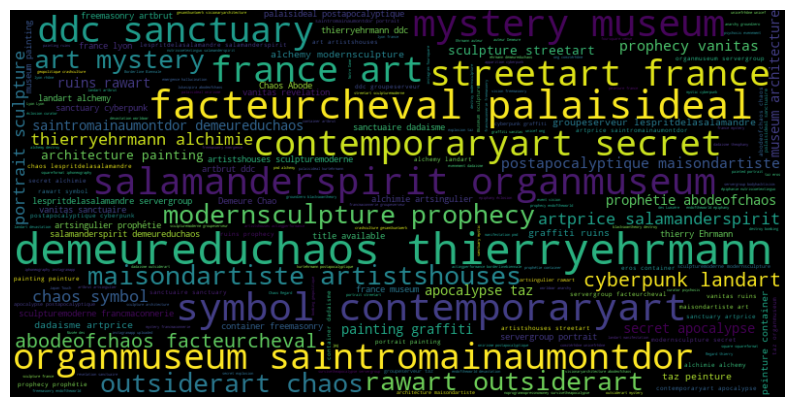

In [124]:
# Nettoyage des tags et titles

# Change data type of tags and title to string
data['tags'] = data['tags'].astype(str)
data['title'] = data['title'].astype(str)

# Remove special characters from tags
data['tags'] = data['tags'].str.replace('[^a-zA-Z0-9,]', ' ')

# Remove special characters from titles
data['title'] = data['title'].str.replace('[^a-zA-Z0-9,]', ' ')

# Removing stopwords
stopwords = ["est", "cette", "cela", "ceci", "celui", "celle", "ceux", "celles", "le", "la", "les", "l", "d", "qu", "que", "qui", "quoi", "dont", "ou", "et", "mais", "ou", "donc", "ni", "car", "en", "dans", "sur", "sous", "devant", "derrière", "à", "de", "par", "pour", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans", "depuis", "pendant", "pour", "à", "de", "par", "avec", "sans", "chez", "dans", "hors", "vers", "dans"]

# Remove stopwords from tags
data['tags'] = data['tags'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))

# Remove stopwords from titles
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))

# Remove empty tags and titles
data = data[data['tags'] != '']
data = data[data['title'] != '']
data = data.reset_index(drop=True)

# Remove frequent words (e.g. "photo")
frequent_words = ["photo", "image", "picture", "pic", "photograph", "photography", "photographie", "foto", "fotografia", "fotografia", "fotografia", "ddc", "france", "nan", "nan nan", "secret", "du", "Chao"]
# Remove frequent words from tags
data['tags'] = data['tags'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in frequent_words]))

# Remove frequent words from titles
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in frequent_words]))
                                    
# Visualizing the data with a word cloud
def plot_wordcloud(text):
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Concatenate all tags
tags = ','.join(data['tags'])
title = ','.join(data['title'])
text = tags + ',' + title

# Plot the word cloud
plot_wordcloud(text)




